## Black hole formation channels and gaussian mixtures

Some events form in different astrophysical environments than others. **You want to figure out how many of formation channels are at play.**


The strategy here is to fit a Gaussian Mixture model: that is, my model is a sum of $N$ gaussians each with mean $\mu_j$ and standard deviation $\sigma_j$ and weight $\alpha_j$:

$p(x_i|\theta) = \sum_{j=1}^N \alpha_j \mathcal{N}(\mu_j,\sigma_j) $

This depends on $3N-1$ parameters (not $3N$ because the sum of the $\alpha_j$ must be unity to ensure that this is a probability.

#### Tasks

1) Load this file (`np.load`) and complete a quick exploration of the data. How many modes do you think you see?

2) Take some time to explore `sklearn.mixture.GaussianMixture`. Check the documentation, some examples, the help menu, etc. You first need to define the model (instance of a class), and then train it on the data using the `fit` method (the data provided are already in the right numpy format!). This will output the trained model, which has various attributes.

*Note*. We'll do a more formal introduction to scikit-learn in one of the next lectures. This is meant to be a formative example on how you might find yourself dealing with a library you've never seen before. This happens *all the time* in scientific research!

3) Complete the fit 10 times with $N=1,...,10$ Gaussians. 

Note: `sklearn` by default will use the so-called [Expectation-Maximization algorithm](https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm), which is one of the many great things in data science we don't have time to study in detail.

4) For each of this fits, compute the AIC (easy! It's a attribute of the trained model!). Plot $N$ vs AIC: which model is preferred?

5) Plot the preferred solution on top of the input data. You should get a very nice fit!

6) Understand (i.e. plot) which Gaussian mode corresponds to which part of the input dataset. 

*Hint:* Useful methods here are `score_samples` and `predict_proba`: you'll need them both. Try to understand what they do and how you can put them together.




In [147]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture

In [148]:
data = np.load("../solutions/formationchannels.npy")
data[:, 0] = np.sort(data[:, 0])

Text(0.5, 0, '$M_{BH}\\ [M_\\odot]$')

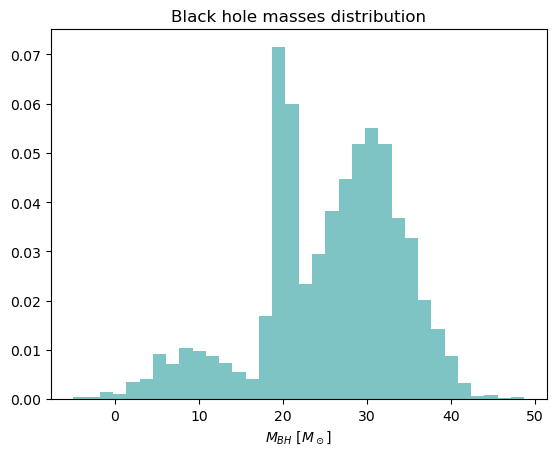

In [149]:
#Plot data

fig_data = plt.figure()
ax = fig_data.add_subplot()
ax.hist(data, alpha=0.5, color="darkcyan", bins="fd", density=True, label="Data")
plt.title("Black hole masses distribution")
plt.xlabel("$M_{BH}\ [M_\odot]$")

## Gaussian Mixture model

The model with 3 gaussians is the best


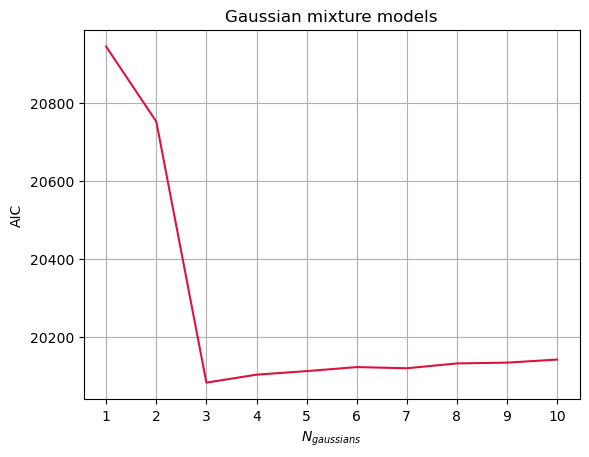

In [151]:
#Train gaussian mixture model with different numbers of gaussians

gm = []
N_gauss = np.arange(1, 11)

for i in N_gauss:
    gm.append(GaussianMixture(n_components = i).fit(data))

#Compute the AIC and plot it

AIC = [gm[i].aic(data) for i in N_gauss - 1]
best_model = N_gauss[np.argsort(AIC)[0]]    #Index of the number of gaussians that minimizes the AIC
gm_best = gm[best_model]

print("The model with " + str(best_model) + " gaussians is the best")

plt.figure()
plt.plot(N_gauss, AIC, color="crimson")
plt.title("Gaussian mixture models")
plt.xlabel("$N_{gaussians}$")
plt.ylabel("AIC")
plt.xticks(np.arange(1, 11, 1))
plt.grid()

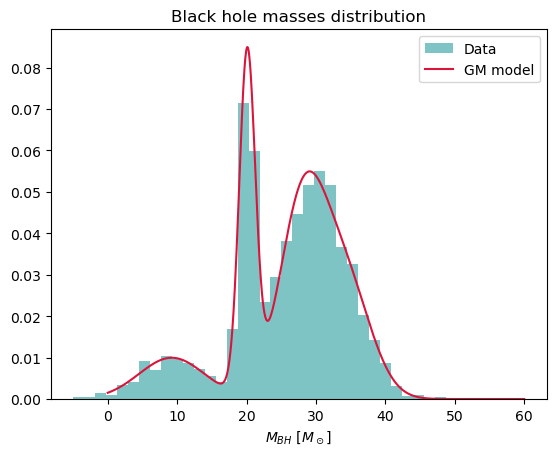

In [152]:
#Plot best model over data

x_grid = np.linspace(0, 60, 1000)
models = np.array(gm_best.score_samples(x_grid[:, np.newaxis]))

ax.plot(x_grid, np.exp(models), c="crimson", label="GM model")
ax.legend()
fig_data

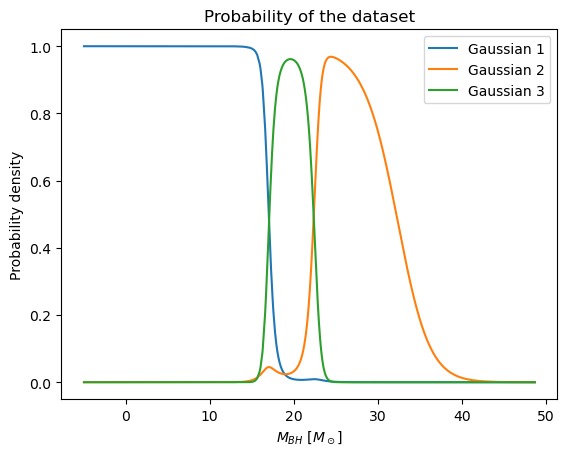

In [153]:
#Responsibilities

gauss = np.array([gm_best.predict_proba(data)[:, i] for i in range(0, best_model + 1)])

#Plot probabilities

plt.figure()

for i in range(0, best_model):
    plt.plot(data, gauss[i], label="Gaussian " + str(i + 1))

plt.title("Probability of the dataset")
plt.xlabel("$M_{BH}\ [M_\odot]$")
plt.ylabel("Probability density")
plt.legend()